## Exploring variable distributions using CTEs

# Business problem

A manager on the marketing team comes to you to ask about the performance of their recent email campaign. Now that the campaign has been launched, the marketing manager wants to know how many users have clicked the link in the email.

While this project was being planned, you collaborated with the front-end engineers to create tracking events for the front end of the product located in the `frontendeventlog` table. One of these events, `eventid = 5` , is logged when the user reaches a unique landing page that is only accessed from this campaign email. Since the event tracks when a user views the unique landing page from the email, tracking `eventid = 5` will be the best method to count how many users have clicked the link in the campaign email.

Since an overall aggregate metric like an average can hide outliers and further insights under the hood, you decide it's best to calculate the distribution of **the number of email link clicks per user**. In other words, how many users clicked the email link one time, two times, three times, and so on?

Since the `frontendeventlog` only logs events that do happen, we can't count the number of users that received the email but *didn*'t click on the link unless we bring in the data from somewhere else. For simplicity, let's ignore this group and only count the events, or email clicks, in the `frontendeventlog` .

**Task:**

Using a CTE and the `frontendeventlog` table, find the distribution of users across the
number of times the email link was clicked per user. 
In other words, count the number of users, `num_users` , in each `num_link_clicks`
category (one click, two clicks, three clicks,...) using `eventid = 5` to track link clicks

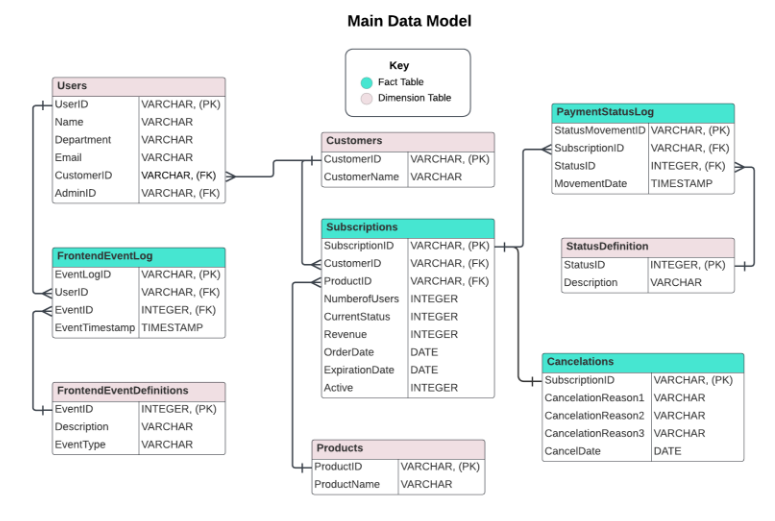

#Solution: 

In [ ]:
-- creating a cte that counts the number of links for each userid by filtering eventid =5 
with link_clicks as (
    select userid, 
    count(eventid) as num_link_clicks
    from FrontendEventLog
    where eventid = 5
    group by userid
)
--counting the number of users in each number of link clicks category and aggregating by number of link clicks
select num_link_clicks, 
        count(userid) as num_users
        from link_clicks
        group by num_link_clicks

# Output:

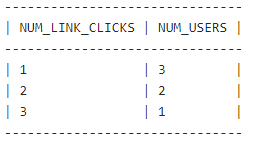